### Plotting Gaussian Areas

Here we plot some Gaussian properties.  Python is particularly useful here because many of the important integrals you need are not analytic.  They are there on most calculators so, especially for exam purposes, its worth making sure you know how to do it.

Take the standard form with $\mu=0$ and $\sigma=1$

$$f(z)=\frac{1}{\sqrt{2\pi}} e^{-z^2/2}$$

We can plot this, then choose a value of $z$ and output the area. Note that $f(z)$ is probability density per unit $z$ not per unit $x$, but when we integrate this doesn't matter. 

First, some setup

In [4]:
from math import *  # basic maths routines
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, output_notebook, show
output_notebook()  # plot inside the notebook
from bokeh.models import Label  # this enables us to annotate the plot


Loading BokehJS ...

Now pick our value of z and calculate the area below $x$ and within $0 \pm z$. 

In [5]:
z=1.0 # set z
Pbelow=round(stats.norm.cdf(z),3)  #  stats.norm.cdf is the CDF of the normal distribution
Pinside=round(1-2.*(1.-stats.norm.cdf(z)),3)  #  stats.norm.cdf
print ('z=',z,' Pinside=',Pinside,' Pbelow =', Pbelow )



z= 1.0  Pinside= 0.683  Pbelow = 0.841


Thats all the stats. The rest is lots of plotting code! First, define the plot limits and resolution, and define/initialise the arrays for holding the plot data. The "inner array" stuf will make sense when you see how the plot works.

In [6]:
xplotmax=3.5 # choose plot range
deltax=0.01 # plot resolution
# initialise x-array with resolution delta-x
xplot=np.arange(-xplotmax,xplotmax,deltax) 
xin=np.arange(-z,z,deltax) # make inner array
yplot=np.zeros(len(xplot)) # this makes the whole plot
yin=np.zeros(len(xin))  # upper boundary for plotting shaded area
ybase=np.zeros(len(xin)) # lower boundary for plotting shaded area

# make yplot
yplot=stats.norm.pdf(xplot)  # note default is mu=0 sig=1
yin=stats.norm.pdf(xin)      
fz=stats.norm.pdf(z) # height of curve at z (and -z)

Now do the actual plotting, including some annotation.

In [7]:
#plot the distribution
p = figure(title="Gaussian distribution", width=600, height=600,
x_axis_label='z', y_axis_label='probability density',
tools="pan,wheel_zoom,box_zoom,reset,hover,crosshair")

p.line(xplot,yplot,line_width=4) # plot distbn

# plot vertical lines at z and -z
p.line([z,z],[0.,fz],line_width=3,color='red')
p.line([-z,-z],[0.,fz],line_width=3,color='red')
#user inner arrays to plot filled-in area
p.varea(xin,ybase,yin,color='red',alpha=0.3)

#annotate with value of area
Pvalue='P='+str(round(Pinside,3))
label1=Label(x=-0.7, y=fz/2.0, text=Pvalue)
zvalue='z='+str(z)
label2=Label(x=-0.5, y=fz/2.0+0.05,text=zvalue)
p.add_layout(label1)
p.add_layout(label2)

# plot the object

show(p)

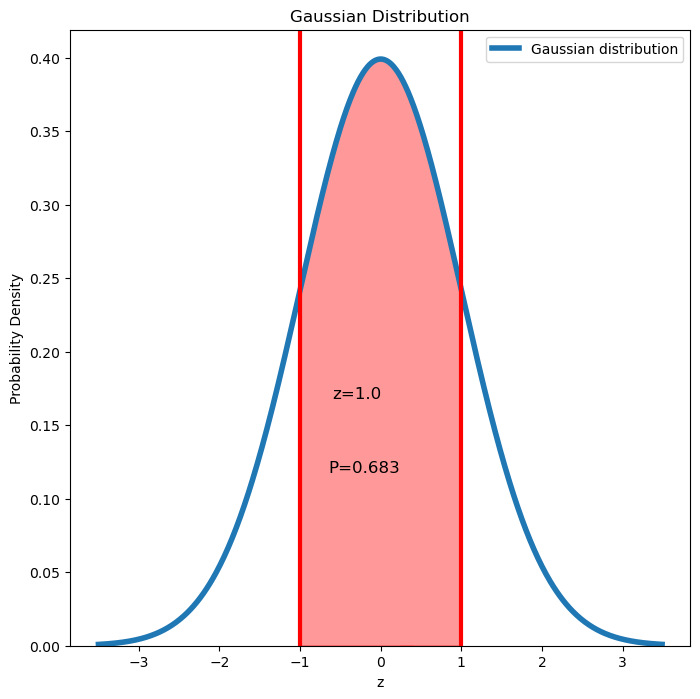

In [16]:


# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot Gaussian distribution
ax.plot(xplot, yplot, linewidth=4, label='Gaussian distribution')

# Plot vertical lines at z and -z
ax.axvline(z, color='red', linewidth=3)
ax.axvline(-z, color='red', linewidth=3)

# Fill the area between vertical lines
ax.fill_betweenx(ybase, xin, yin, color='red', alpha=0.3)


# Fill the area below the Gaussian between the vertical lines
ax.fill_between(xplot, yplot, where=[(x > -z and x < z ) for x in xplot], color='red', alpha=0.4)

# Annotate with the value of the area and z
Pvalue = 'P=' + str(round(Pinside, 3))
zvalue = 'z=' + str(z)
ax.text(-0.2, fz / 2.0, Pvalue, fontsize=12, ha='center', va='center', color='black')
ax.text(-0.2, fz / 2.0 + 0.05, zvalue, fontsize=12, ha='center', va='center', color='black')


# Set labels and title
ax.set_xlabel('z')
ax.set_ylabel('Probability Density')
ax.set_title('Gaussian Distribution')

# Set y-axis to start at zero
ax.set_ylim(0)

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()
